In [3]:
%matplotlib inline
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install xlrd==1.2.0
import xlrd

In [7]:
cat= pd.read_excel('https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true', sheet_name='categories')
br= pd.read_excel('https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true', sheet_name='brands')
pro= pd.read_excel('https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true', sheet_name='products')

1. il catalogo complessivo dei prodotti. Visualizzare il nome del prodotto, il nome della marca e la categoria

In [10]:
pro_cat= pd.merge(cat,pro,how='inner', on=['category_id'])
pro_cat

In [13]:
pro_cat_br= pd.merge(pro_cat,br,how='inner', on=['brand_id'])
pro_cat_br[['product_name','category_name','brand_name']]

,product_name,category_name,brand_name
0,Electra Cruiser 1 (24-Inch) - 2016,Children Bicycles,Electra
1,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,Children Bicycles,Electra
2,Electra Girl's Hawaii 1 (20-inch) - 2015/2016,Children Bicycles,Electra
3,"Electra Girl's Hawaii 1 16"" - 2017",Children Bicycles,Electra
4,Electra Moto 3i (20-inch) - Boy's - 2017,Children Bicycles,Electra
...,...,...,...
316,Surly Straggler - 2018,Road Bikes,Surly
317,Ritchey Timberwolf Frameset - 2016,Mountain Bikes,Ritchey
318,Heller Shagamaw Frame - 2016,Mountain Bikes,Heller
319,Heller Bloodhound Trail - 2018,Mountain Bikes,Heller


2. il numero di prodotti per ogni categoria. Visualizzare i nomi delle categorie e il numero dei prodotti.

In [57]:
cat_prod= pro_cat_br.groupby('category_name').count().reset_index()
cat_prod[['category_name','product_id']]

,category_name,product_id
0,Children Bicycles,59
1,Comfort Bicycles,30
2,Cruisers Bicycles,78
3,Cyclocross Bicycles,10
4,Electric Bikes,24
5,Mountain Bikes,60
6,Road Bikes,60


3. il numero di prodotti per ogni marca (brand). Visualizzare i nomi dei brand e il numero di prodotti

In [55]:
br_prod= pro_cat_br.groupby('brand_name').count().reset_index()
br_prod[['brand_name','product_id']]

,brand_name,product_id
0,Electra,118
1,Haro,10
2,Heller,3
3,Pure Cycles,3
4,Ritchey,1
5,Strider,3
6,Sun Bicycles,23
7,Surly,25
8,Trek,135


4. i nomi dei prodotti della marca Trek

In [28]:
pcb_Trek = pro_cat_br[pro_cat_br['brand_name']=='Trek'][['product_name']]
pcb_Trek

,product_name
118,Trek Boy's Kickster - 2015/2017
119,Trek Girl's Kickster - 2017
120,Trek Precaliber 12 Boys - 2017
121,Trek Precaliber 12 Girls - 2017
122,Trek Precaliber 16 Boys - 2017
...,...
248,Trek Checkpoint ALR 5 - 2019
249,Trek Checkpoint ALR 5 Women's - 2019
250,Trek Checkpoint SL 5 Women's - 2019
251,Trek Checkpoint SL 6 - 2019


5. i prodotti delle categorie che hanno la parola 'Bikes' nel nome

In [29]:
pcb_Bikes = pro_cat_br[pro_cat_br['category_name'].str.contains('Bikes')][['product_name']]
pcb_Bikes

,product_name
113,Electra Loft Go! 8i - 2018
114,Electra Townie Go! 8i - 2017/2018
115,Electra Townie Go! 8i Ladies' - 2018
116,Electra Townie Commute Go! - 2018
117,Electra Townie Commute Go! Ladies' - 2018
...,...
316,Surly Straggler - 2018
317,Ritchey Timberwolf Frameset - 2016
318,Heller Shagamaw Frame - 2016
319,Heller Bloodhound Trail - 2018


6. la categoria che ha il prodotto che costa di più

In [35]:
maxprice = pro_cat_br[pro_cat_br['list_price']==pro_cat_br['list_price'].max()]['category_name']
maxprice

222    Road Bikes
Name: category_name, dtype: object

7. i brand con almeno 100 prodotti. Viaulizzare il nome del brand e il numero di prodotti

In [62]:
hundred_plus= pro_cat_br.groupby('brand_name').count().reset_index()
hplus = hundred_plus[hundred_plus['category_id']>=100][['brand_name','product_name']]
hplus

,brand_name,product_name
0,Electra,118
8,Trek,135


8. la marca del prodotto 'Electra Townie Original 21D - 2016'

In [30]:
ETO = pro_cat_br[pro_cat_br['product_name']=='Electra Townie Original 21D - 2016'][['brand_name']]
ETO

,brand_name
28,Electra
49,Electra


9. il numero di prodotti per ogni anno. Visualizzare l'anno e il numero di prodotti

In [44]:
year_products= pro_cat_br.groupby('model_year').count().reset_index()
year_products[['model_year','product_id']]

,model_year,product_id
0,2016.0,25
1,2017.0,85
2,2018.0,195
3,2019.0,6


# Visualizzare i grafici più adatti per le richieste 2, 3, 7 e 9


In [46]:
import matplotlib.pyplot as plt

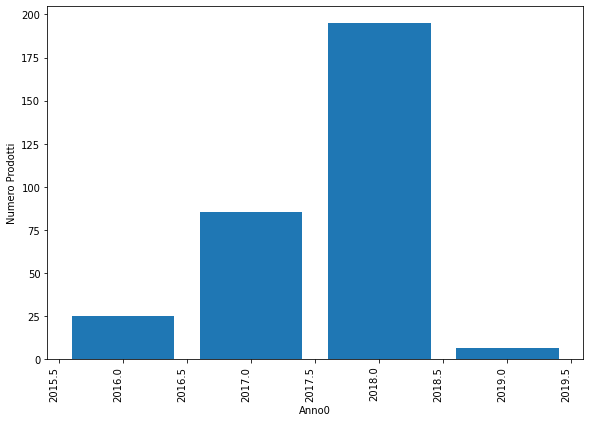

In [49]:
fig = plt.figure(figsize=(9.6, 7.2))  
ax = plt.axes()
fig.autofmt_xdate(rotation=90)

ax.set_xlabel('Anno0')
ax.set_ylabel('Numero Prodotti')
ax.bar(year_products['model_year'],year_products['product_id'])
plt.show()

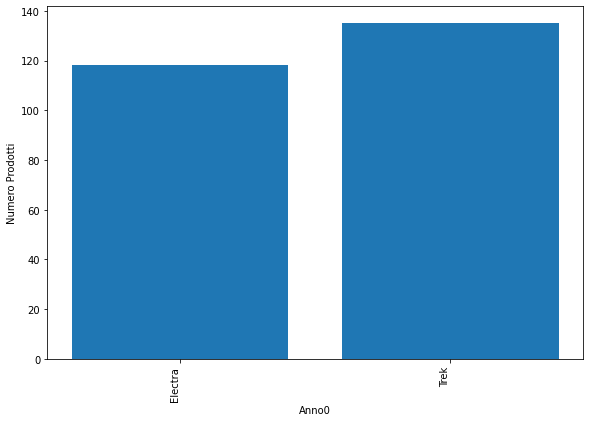

In [63]:
fig = plt.figure(figsize=(9.6, 7.2))  
ax = plt.axes()
fig.autofmt_xdate(rotation=90)

ax.set_xlabel('Anno0')
ax.set_ylabel('Numero Prodotti')
ax.bar(hplus['brand_name'],hplus['product_name'])
plt.show()

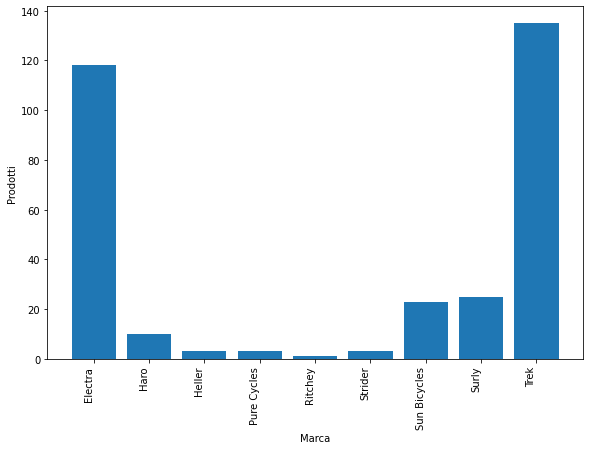

In [56]:
fig = plt.figure(figsize=(9.6, 7.2))  
ax = plt.axes()
fig.autofmt_xdate(rotation=90)

ax.set_xlabel('Marca')
ax.set_ylabel('Prodotti')
ax.bar(br_prod['brand_name'],br_prod['product_id'])
plt.show()

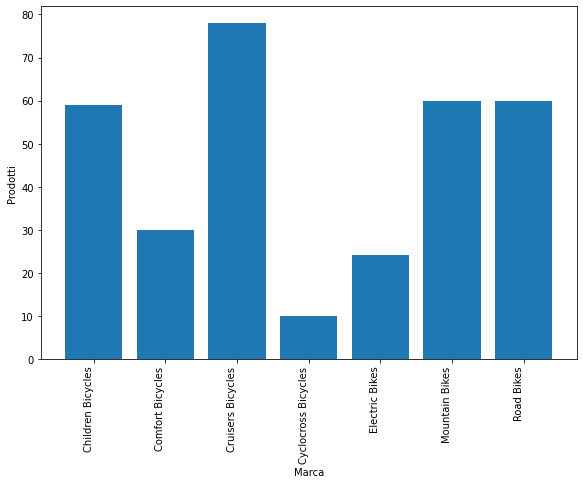

In [59]:
fig = plt.figure(figsize=(9.6, 7.2))  
ax = plt.axes()
fig.autofmt_xdate(rotation=90)

ax.set_xlabel('Marca')
ax.set_ylabel('Prodotti')
ax.bar(cat_prod['category_name'],cat_prod['product_id'])
plt.show()